In [79]:
import pandas as pd

df = pd.read_csv('final_job_list.csv')
df.head()


,Title,Company,Location,Type of Positions,Job Description,Salary,Identified_Skills
0,"Staff Applied Scientist, Marketplace",ThredUp Inc.,CA,Full-time,\nAbout thredUP thredUP is transforming resale...,190000.0,"['python', 'machine learning', 'aws', 'sql']"
1,Prompt Engineer for Generative AI (chatbot and...,Vicarious Talent Agency,WA,Full-time,"We are Vicarious, a talent agency that represe...",70000.0,"['python', 'machine learning', 'deep learning'..."
2,Data Systems Analyst/Architect,General Dynamics Information Technology,Remote,Full-time,Clearance Level None Category Data Science Loc...,104000.0,"['machine learning', 'aws', 'azure', 'nosql', ..."
3,AIOps Principle Data Scientist,CVS Health,CT,Full-time,\nBring your heart to CVS Health. Every one of...,140000.0,"['python', 'machine learning', 'aws', 'gcp']"
4,Sr. Data Scientist,Altak Group,Remote,Full-time,Job Summary:\nWe are seeking an experienced Da...,136000.0,"['python', 'machine learning', 'tableau', 'aws..."


In [81]:
import arabic_reshaper
from bidi.algorithm import get_display

def fix_hebrew_text(text):
    """מתקן טקסט עברי לשימוש ב-Matplotlib"""
    reshaped_text = arabic_reshaper.reshape(text)
    fixed_text = get_display(reshaped_text)
    return fixed_text
    

In [80]:
roles = ['Data Scientist', 'Machine Learning Engineer']
salary_comparison = df[df['Title'].isin(roles)].groupby('Title')['Salary'].mean()

print("שכר ממוצע בדולרים לפי תפקיד:")
print(salary_comparison)

שכר ממוצע בדולרים לפי תפקיד:
Title
Data Scientist                95584.392157
Machine Learning Engineer    142907.142857
Name: Salary, dtype: float64


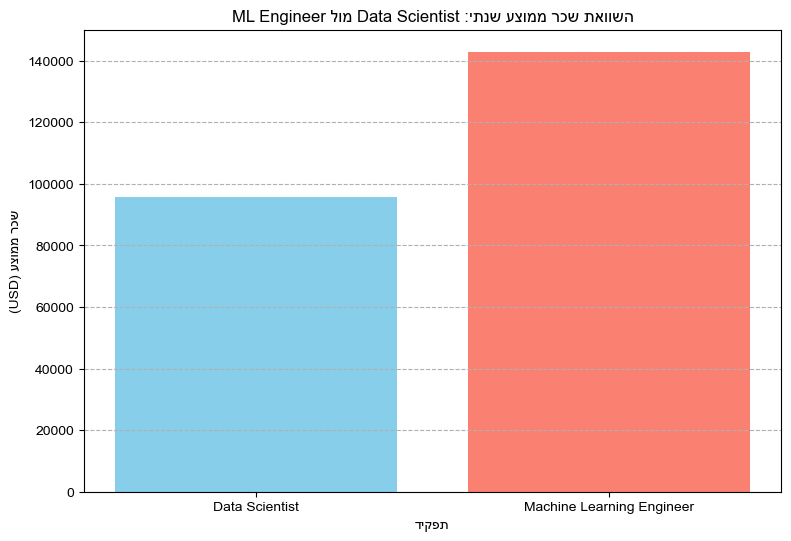

In [82]:
import matplotlib.pyplot as plt

fixed_titles = salary_comparison.index.map(fix_hebrew_text)

plt.rcParams['font.family'] = 'Arial'

plt.figure(figsize=(9, 6)) 

plt.bar(fixed_titles, salary_comparison.values, color=['skyblue', 'salmon'])

plt.title(fix_hebrew_text('השוואת שכר ממוצע שנתי: Data Scientist מול ML Engineer'))
plt.ylabel(fix_hebrew_text('שכר ממוצע (USD)'))
plt.xlabel(fix_hebrew_text('תפקיד'))
plt.xticks(rotation=0) 

plt.grid(axis='y', linestyle='--')
plt.show()

In [83]:
location_mapping = {
    'NY': 'New York',
    'CA': 'California',
    'TX': 'Texas',
    'UK': 'United Kingdom',
    'DE': 'Germany',
    'US': 'United States',
    'CO': 'Colorado',
    'VA': 'Virginia',
    'MD': 'Maryland',
    'MA': 'Massachusetts',
    'OH': 'Ohio',
    'WA': 'Washington'
}

In [84]:
df['Location'] = df['Location'].replace(location_mapping)

top_locations = df['Location'].value_counts().head(10)

print("10 המיקומים המובילים (שמות מלאים):")
print(top_locations)

10 המיקומים המובילים (שמות מלאים):
Location
California       228
Remote            49
New York          48
Texas             42
Colorado          41
Virginia          33
Maryland          31
Massachusetts     20
Ohio              19
Washington        18
Name: count, dtype: int64


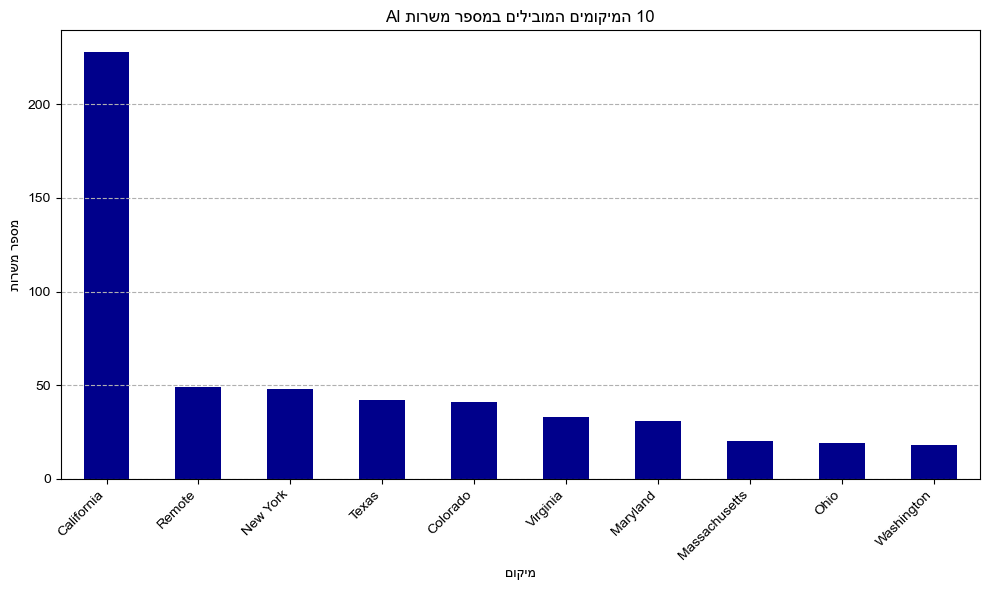

In [85]:
import matplotlib.pyplot as plt

top_locations = df['Location'].value_counts().head(10)

plt.figure(figsize=(10, 6))

top_locations.plot(kind='bar', color='darkblue') 

plt.title(fix_hebrew_text('10 המיקומים המובילים במספר משרות AI'))
plt.xlabel(fix_hebrew_text('מיקום')) 
plt.ylabel(fix_hebrew_text('מספר משרות'))
plt.xticks(rotation=45, ha='right')

plt.grid(axis='y', linestyle='--') 
plt.tight_layout()
plt.show()

שכר ממוצע לפי מודל עבודה:
Work_Mode
In-Office    132969.194401
Remote       111212.734694
Name: Salary, dtype: float64


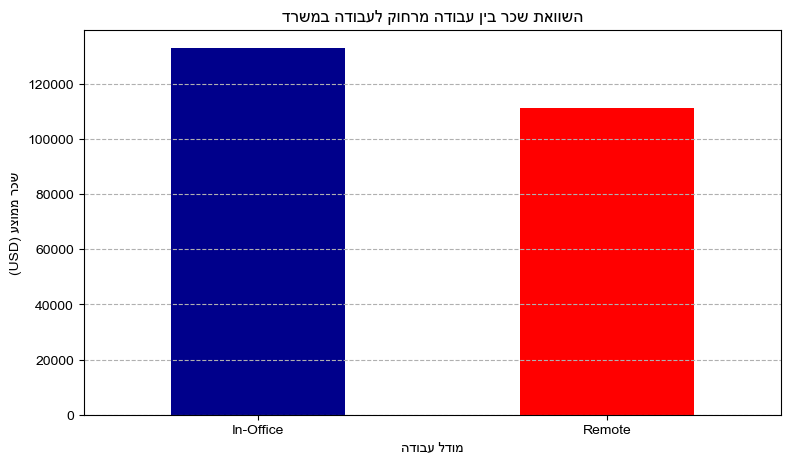

In [86]:
import matplotlib.pyplot as plt

df['Work_Mode'] = df['Location'].apply(lambda x: 'Remote' if 'Remote' in x else 'In-Office')

salary_mode_comparison = df.groupby('Work_Mode')['Salary'].mean().sort_values(ascending=False)

print("שכר ממוצע לפי מודל עבודה:")
print(salary_mode_comparison)

plt.figure(figsize=(9, 5)) 
salary_mode_comparison.plot(kind='bar', color=['darkblue', 'red'])

plt.title(fix_hebrew_text('השוואת שכר בין עבודה מרחוק לעבודה במשרד'))
plt.ylabel(fix_hebrew_text('שכר ממוצע (USD)'))
plt.xlabel(fix_hebrew_text('מודל עבודה'))
plt.xticks(rotation=0) 
plt.grid(axis='y', linestyle='--')
plt.show()

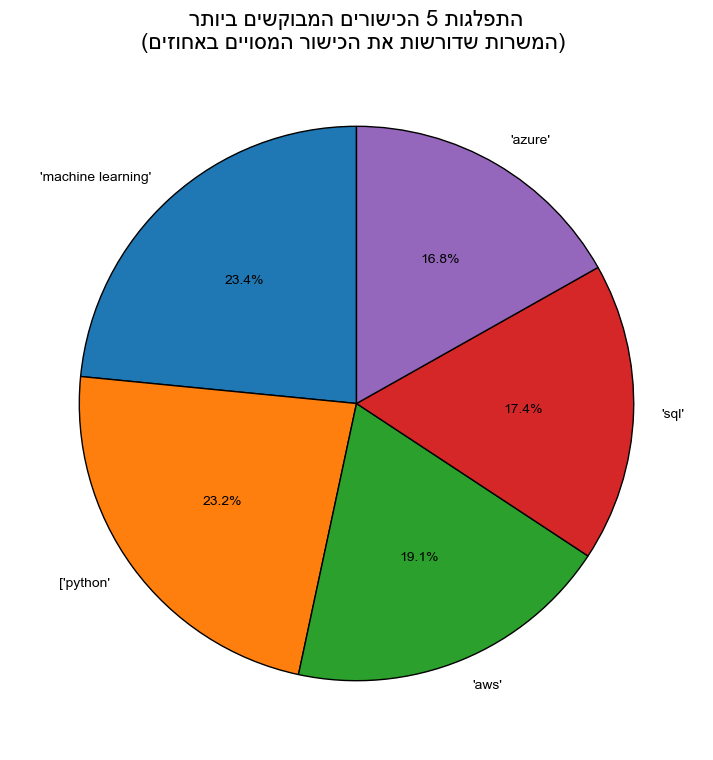

In [87]:
import matplotlib.pyplot as plt
import pandas as pd

split_skills = df['Identified_Skills'].str.split(',') 
flat_skills_df = split_skills.explode() 
flat_skills_df = flat_skills_df.str.strip().dropna()

skill_counts = flat_skills_df.value_counts()
top_5_skills = skill_counts.head(5)

values = top_5_skills.values
labels = top_5_skills.index.map(fix_hebrew_text) 

plt.figure(figsize=(9, 9))
plt.pie(
    values, 
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops={'edgecolor': 'black'}
)

plt.title(fix_hebrew_text('התפלגות 5 הכישורים המבוקשים ביותר\n (המשרות שדורשות את הכישור המסויים באחוזים)'), fontsize=16)
plt.show()